## Currency exchange


Currency Exchange is one of the biggest financial markets. It is a licensed business that allows customers to exchange one currency for another. Currently, 1 United States dollar is equivalent to 82.64 Indian rupees. Many factors affect exchange rates such as economic, political and even psychological factors.

## Currency Exchange Rate Prediction

The chnage in Exchnage Rates happen on a daily basis and it affects the income of a person, business and the economy of the country. Thus, predicting the currency exchange rates can help an individual as well as the country in many ways. 

Here I will be predicting the exchange rate with Machine learning using Python.

## Data Extraction 

The data that is used here has been taken from *Yahoo Finance*. 
Time period of the data: 1-11-2021 to 1-11-2022


### Importing Python Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from seaborn import regression

In [2]:
# reading the dataset 

sns.set()
plt.style.use('seaborn-whitegrid')

data = pd.read_excel(r"C:\Users\hp\Desktop\Projects\INR.xlsx")
print(data.head())

        Date       Open       High        Low      Close  Adj Close  Volume
0 2021-11-01  74.928398  75.186302  74.810501  74.928299  74.928299       0
1 2021-11-02  74.829903  74.909302  74.613297  74.829903  74.829903       0
2 2021-11-03  74.712303  74.765503  74.407997  74.711998  74.711998       0
3 2021-11-04  74.435501  74.554001  74.235001  74.435501  74.435501       0
4 2021-11-05  74.478104  74.580498  74.050598  74.478104  74.478104       0


### Data Cleaning

In [3]:
#length of the data
data.shape

(262, 7)

In [4]:
#checking non-null values 
data.info

<bound method DataFrame.info of           Date       Open       High        Low      Close  Adj Close  Volume
0   2021-11-01  74.928398  75.186302  74.810501  74.928299  74.928299       0
1   2021-11-02  74.829903  74.909302  74.613297  74.829903  74.829903       0
2   2021-11-03  74.712303  74.765503  74.407997  74.711998  74.711998       0
3   2021-11-04  74.435501  74.554001  74.235001  74.435501  74.435501       0
4   2021-11-05  74.478104  74.580498  74.050598  74.478104  74.478104       0
..         ...        ...        ...        ...        ...        ...     ...
257 2022-10-26  82.445297  82.550598  81.924202  82.445297  82.445297       0
258 2022-10-27  82.049599  82.706497  81.928299  82.049599  82.049599       0
259 2022-10-28  82.442497  82.781303  82.278000  82.442497  82.442497       0
260 2022-10-31  82.239197  83.123001  82.193001  82.239197  82.239197       0
261 2022-11-01  82.745003  82.797997  82.583000  82.610001  82.610001       0

[262 rows x 7 columns]>

In [5]:
#checking if columns have duplicate data
data.duplicated().sum()

0

### In this dataset, the values in the “Close” column are the target values that we need to predict.

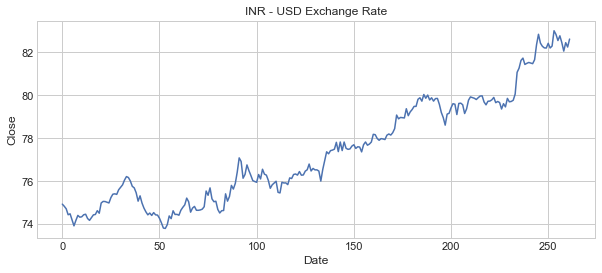

In [6]:
plt.figure(figsize=(10, 4))
plt.title("INR - USD Exchange Rate")
plt.xlabel("Date")
plt.ylabel("Close")
plt.plot(data["Close"])
plt.show()

### Preparing the dataset by storing the most relevant features in the variable x and storing the target column in the variable y

In [7]:
x = data[["Open", "High", "Low"]]
y = data["Close"]
x = x.to_numpy()
y = y.to_numpy()
y = y.reshape(-1, 1)

### Taking a look at the correlation between the features before training the currency exchange rate prediction model

               Open      High       Low     Close  Adj Close  Volume
Open       1.000000  0.997521  0.997875  0.999901   0.999901     NaN
High       0.997521  1.000000  0.997420  0.997531   0.997531     NaN
Low        0.997875  0.997420  1.000000  0.997912   0.997912     NaN
Close      0.999901  0.997531  0.997912  1.000000   1.000000     NaN
Adj Close  0.999901  0.997531  0.997912  1.000000   1.000000     NaN
Volume          NaN       NaN       NaN       NaN        NaN     NaN


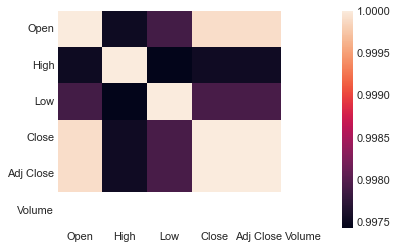

In [8]:
print(data.corr())
sns.heatmap(data.corr())
plt.show()

### Splitting the data 

In [9]:
from sklearn.model_selection import train_test_split

xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2, random_state=42) 

In [10]:
# Train - Validation split

xtrain, xvalid, ytrain, yvalid = train_test_split(xtrain, ytrain, test_size = 0.25)

In [11]:
print(len(xtrain),len(xvalid),len(xtest))

156 53 53


### Training a currency exchange prediction model using the Decision Tree Regression model

In [42]:
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor(max_depth = 3, min_samples_leaf = 5)
model.fit(xtrain, ytrain)
# ypred = model.predict(xtest)

DecisionTreeRegressor(max_depth=3, min_samples_leaf=5)

### Prediction

In [43]:
ypred = model.predict(xvalid)
ypred

array([79.52156573, 74.40055329, 82.51018713, 79.52156573, 82.51018713,
       77.9836892 , 74.40055329, 74.40055329, 77.32516838, 75.13743993,
       74.40055329, 74.40055329, 77.9836892 , 75.13743993, 74.40055329,
       75.13743993, 76.10908103, 76.10908103, 76.10908103, 76.10908103,
       75.13743993, 79.52156573, 77.32516838, 75.13743993, 76.10908103,
       76.10908103, 77.32516838, 76.10908103, 76.10908103, 79.52156573,
       77.9836892 , 74.40055329, 76.10908103, 75.13743993, 79.52156573,
       77.32516838, 77.32516838, 79.52156573, 77.32516838, 82.51018713,
       76.10908103, 74.40055329, 74.40055329, 75.13743993, 82.51018713,
       76.10908103, 76.10908103, 74.40055329, 75.13743993, 79.52156573,
       79.52156573, 82.51018713, 77.32516838])

### Model Performance Checks 

In [44]:
# Mean Absolute Error 

np.mean(np.abs(yvalid - ypred))

2.6384583052361967

### Hyperparameter Tuning - Choosing best depth 

In [34]:
depth = np.arange(1,10)
mae = []

for k in depth:
    model = DecisionTreeRegressor(max_depth = k, min_samples_leaf = 5)
    model.fit(xtrain,ytrain)
    ypred = model.predict(xvalid)
    mae.append(np.mean(np.abs(yvalid - ypred)))

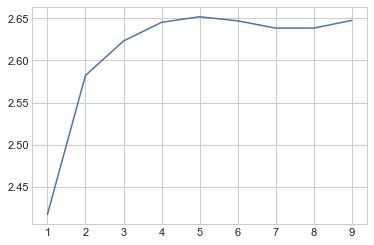

In [35]:
plt.plot(depth, np.array(mae))
plt.show()

In [17]:
depth = 1

### Final Testing

In [48]:
# fit a DT model of depth 1 on the training data and test its performance on the test data by calculating the MAE 

model = DecisionTreeRegressor(max_depth = 1, min_samples_leaf = 5)
model.fit(xtest,ytest)

DecisionTreeRegressor(max_depth=1, min_samples_leaf=5)

In [49]:
ypred = model.predict(xtest)

In [50]:
MAE = np.mean(np.abs(ytest - ypred))
MAE

2.7752188608045634

The MAE of test data is more than the training data

----------------------------------------------------------------------------------------------------------------------------

## Linear Regression

In [21]:
from sklearn.linear_model import LinearRegression

In [22]:
model = LinearRegression()
model.fit(xtrain, ytrain)
y_pred = model.predict(xtest)
print(model.score(xtrain, ytrain))
print(model.score(xtest, ytest))

0.999934173316159
0.9994270061664696


The percentage between training and testing data is pretty much close, meaning that the accuracy of the model is relatively good